In [1]:
from data_pipeline import ETL_Pipeline

In [2]:
etl = ETL_Pipeline()

In [3]:
etl.extract()

In [4]:
etl.transform()

/workspace/ReinforcementLearning/data_pipeline.py:79: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2016-01-28' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  transformed_df.at[customer_id, 'Sent_Date'] = sent_date


In [5]:
etl.load()

In [6]:
from model import QLearningAgent

In [7]:
from environment import EmailEnvironment

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("transformed_data.csv", index_col=0, low_memory=False)

Unfortunately, late into the night Saturday, and running through into the morning Sunday, I realized that the full data set was not going to be able to be trained in time. I after it ran for 8 hours, 1 episode was not finished. I gave a few tries to optimization before I needed to make sure something worked to turn in. This is the data working on a much shortened version of the userbase, only the first 5000. Which was how I ended up programming the model and testing it to began with. It worked well on that size, but the whole database ended up being way too much. I explained in the systemsplan what could be done to improve and optimize the model, but could not get it in by the weekend. I apologize 

In [10]:
df = df.head(5000)

This is the first test of the model, using the default values for the QLearningAgent. alpha=0.5, epsilon=0.5, gamma=0.5) and 50 episodes. The performance with these vaules did not go well, and the model actually regressed in performance after a while, so clearly the values are not optimal.

In [11]:
# Create the environment
data = df.values # Load your data here
env = EmailEnvironment(data)

# Create the Q-learning agent
agent = QLearningAgent(env)

# Train the agent
agent.learn(num_episodes=50)

# Play the agent
stats = agent.play()

In [12]:
# agent.q_table This will return the qtable but it is too large to print

In [13]:
agent.get_best_action(('F', 'C', 'KMBMKcI60@gmail.com', 33.0, 8.0))

[2]

In [14]:
stats

{'total_reward': -131315.0,
 'average_reward': -13131.5,
 'max_reward': -12335.0,
 'min_reward': -14115.0,
 'num_episodes': 10}

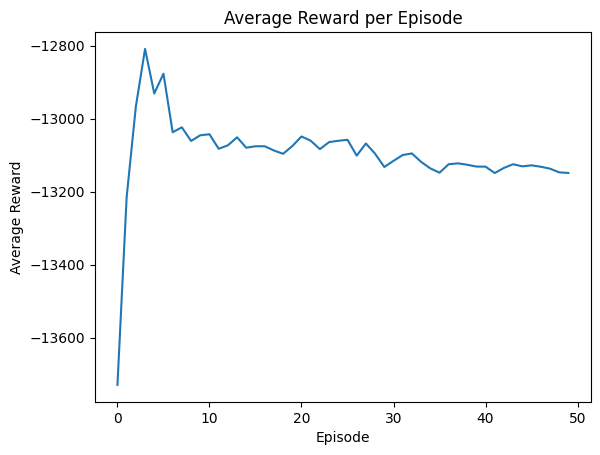

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Train the agent
episode_rewards = []
for episode in range(50):
    episode_reward = 0.0
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        state = next_state
    episode_rewards.append(episode_reward)

# Calculate the average reward per episode
avg_rewards = [np.mean(episode_rewards[0:i]) for i in range(1, len(episode_rewards) + 1)]

# Plot the average reward per episode
plt.plot(avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')
plt.show()

This is the second test of the model, using the default values for the QLearningAgent. alpha=0.1, epsilon=0.1, gamma=0.99) and 50 episodes. This model actually performed well and start to increase, then cap out around 35 episodes. This model is is the best out of the tests that were done with the alpha, gamma, and epsilon values.

In [16]:
# Create the environment
data = df.values # Load your data here
env = EmailEnvironment(data)

# Create the Q-learning agent
agent = QLearningAgent(env, alpha=0.1, epsilon=0.1, gamma=0.99)

# Train the agent
agent.learn(num_episodes=50)

In [17]:
# agent.q_table This will return the qtable but it is too large to print

In [18]:
agent.get_best_action(('F', 'C', 'KMBMKcI60@gmail.com', 33.0, 8.0))

[2]

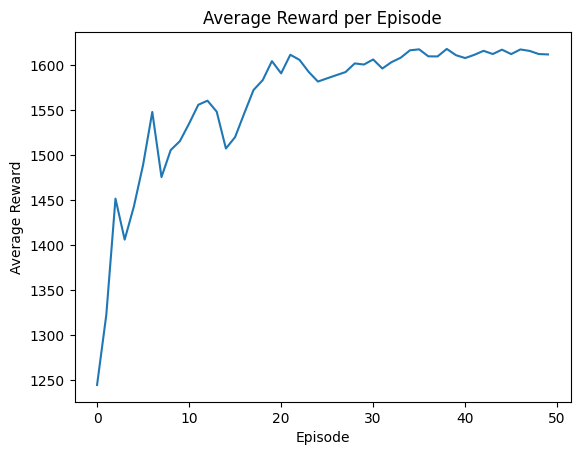

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Train the agent
episode_rewards = []
for episode in range(50):
    episode_reward = 0.0
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        state = next_state
    episode_rewards.append(episode_reward)

# Calculate the average reward per episode
avg_rewards = [np.mean(episode_rewards[0:i]) for i in range(1, len(episode_rewards) + 1)]

# Plot the average reward per episode
plt.plot(avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')
plt.show()

In [20]:
import pickle

# save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(agent, f)

# load the model from the file
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [21]:
# Create the environment
data = df.values # Load your data here
env = EmailEnvironment(data)

# Create the Q-learning agent
agent = QLearningAgent(env, alpha=0.3, epsilon=0.3, gamma=0.9)

# Train the agent
agent.learn(num_episodes=50)

In [22]:
# agent.q_table This will return the qtable but it is too large to print

In [23]:
agent.get_best_action(('F', 'C', 'KMBMKcI60@gmail.com', 33.0, 8.0))

[2]

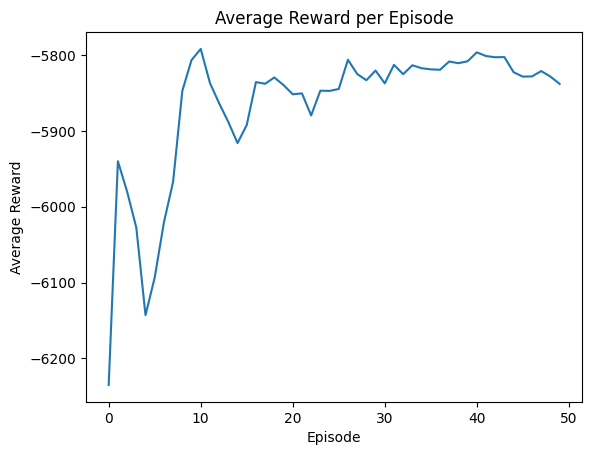

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Train the agent
episode_rewards = []
for episode in range(50):
    episode_reward = 0.0
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        state = next_state
    episode_rewards.append(episode_reward)

# Calculate the average reward per episode
avg_rewards = [np.mean(episode_rewards[0:i]) for i in range(1, len(episode_rewards) + 1)]

# Plot the average reward per episode
plt.plot(avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')
plt.show()